In [208]:
import seaborn as sns
import pandas as pd
import numpy as np

In [209]:
dataset = pd.read_csv('venezia.csv', index_col=False)
dataset_2015 = dataset[pd.DatetimeIndex(dataset["datetime"]).year == 2015]

<AxesSubplot:ylabel='Frequency'>

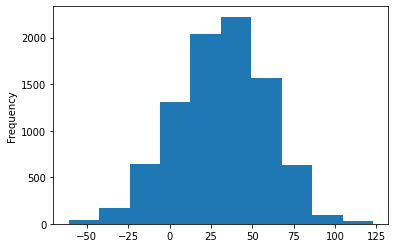

In [210]:
dataset_2015["level"].plot(kind="hist") 

In [211]:
dataset_2015 = dataset_2015.set_index(pd.DatetimeIndex(dataset_2015['datetime']))
dataset_2015 = dataset_2015.drop(['datetime'], axis=1)
dataset_2015.head()

,level
datetime,
2015-01-01 00:00:00,3.0
2015-01-01 01:00:00,-5.0
2015-01-01 02:00:00,-9.0
2015-01-01 03:00:00,-7.0
2015-01-01 04:00:00,2.0


In [227]:
dataset_meteo = pd.read_csv('meteos.csv')

In [228]:
dataset_meteo

,YEAR,MO,DY,HR,T2M;
0,2015,1,1,1,0.77;
1,2015,1,1,2,1.14;
2,2015,1,1,3,1.55;
3,2015,1,1,4,1.77;
4,2015,1,1,5,1.9;
...,...,...,...,...,...
2155,2015,3,31,20,13.56;
2156,2015,3,31,21,13.28;
2157,2015,3,31,22,12.55;
2158,2015,3,31,23,11.42;


In [214]:
dataset_meteo['HR'] = np.where(dataset_meteo['HR'] >= 10 , dataset_meteo['HR'],"0"+dataset_meteo['HR'].astype("string"))
dataset_meteo['MO']= np.where(dataset_meteo['MO'] >= 10 , dataset_meteo['MO'],"0"+dataset_meteo['MO'].astype("string"))
dataset_meteo['DY'] = np.where(dataset_meteo['DY'] >= 10 , dataset_meteo['DY'],"0"+dataset_meteo['DY'].astype("string"))

In [215]:
dataset_meteo['time'] =  dataset_meteo['HR'].astype("string") + ':' + '00' + ':' + '00'
dataset_meteo['date'] =  dataset_meteo['YEAR'].astype("string") + '-' + dataset_meteo['MO'].astype("string") + '-' + dataset_meteo['DY'].astype("string")

In [216]:
format = '%Y-%m-%d %H:%M:%S'
dataset_meteo['Datetime'] = pd.to_datetime(dataset_meteo['date'] + ' ' + dataset_meteo['time'], format=format)
dataset_meteo = dataset_meteo.set_index(pd.DatetimeIndex(dataset_meteo['Datetime']))

In [217]:
dataset_meteo = dataset_meteo.drop(['YEAR','MO','DY','HR','time','date','Datetime'], axis=1)
dataset_meteo = dataset_meteo.rename(columns= {'T2M;':'temperature'})

In [218]:
dataset_meteo["temperature"] = dataset_meteo["temperature"].apply(lambda x: float(x.replace(';','')))

In [219]:
dataset_finale = dataset_2015.join(dataset_meteo).dropna()

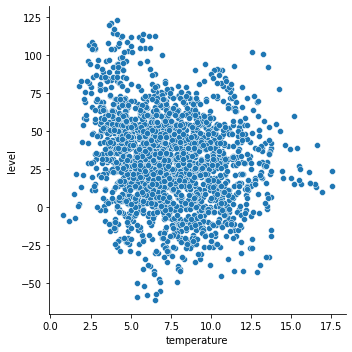

In [230]:
sns.relplot(data=dataset_finale,x="temperature",y="level")

<AxesSubplot:xlabel='temperature', ylabel='level'>

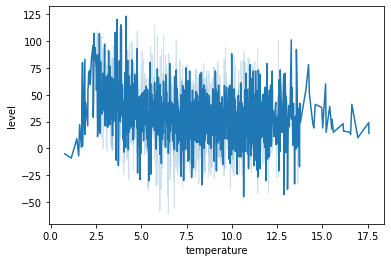

In [236]:
sns.lineplot(data=dataset_finale,x="temperature",y="level")

In [237]:
dataset_finale.mean(axis=1)

datetime
2015-01-01 01:00:00    -2.115
2015-01-01 02:00:00    -3.930
2015-01-01 03:00:00    -2.725
2015-01-01 04:00:00     1.885
2015-01-01 05:00:00     7.450
                        ...  
2015-03-31 20:00:00    52.780
2015-03-31 21:00:00    57.140
2015-03-31 22:00:00    57.275
2015-03-31 23:00:00    52.210
2015-04-01 00:00:00    46.130
Length: 2160, dtype: float64

<AxesSubplot:xlabel='temperature', ylabel='level'>

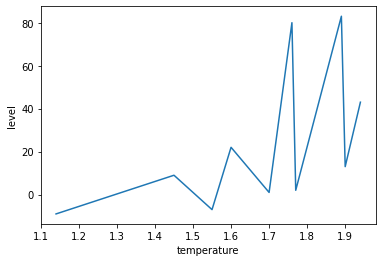

In [268]:
condition = (dataset_finale["temperature"] >= 1.00) & (dataset_finale["temperature"] < 2.00)
dataset_finale[condition]
sns.lineplot(data=dataset_finale[condition],x="temperature",y="level")

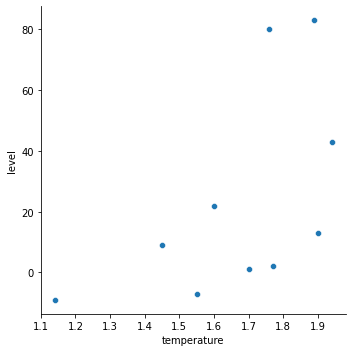

In [273]:
sns.relplot(data=dataset_finale[condition],x="temperature",y="level")

In [292]:
condition = (dataset_finale["temperature"] >= 14.00) & (dataset_finale["temperature"] < 15.00)
dataset_finale[condition].mean(axis=0)

level          43.571429
temperature    14.448571
dtype: float64

In [291]:
print(dataset_finale[condition].max())

level          78.00
temperature    14.96
dtype: float64
